<a href="https://colab.research.google.com/github/s1c5000/tensorflow2.0/blob/main/RNN_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 순환신경망_07


순환신경망(Recurrent Neural Network: RNN)은 순서가있는 데이터를 입력으로 받고,    
같은 네트워크를 이용해 변화하는 입력에 대한 출력을 얻어낸다     

순서가 있는 데이터는 음악, 자연어, 날씨 주가 등 시간의 흐름에 따라 변화하고 그 변화가 의미를 갖는 데이터이다       
이번 장에서는 그중 가장 범용적으로 스이는 자연어 처리에 순환 신경망을 사용하는 방법을 알아보겠다

RNN은 되먹인 구조를 가지고 있다.    
레이어의 출력을 다시 입력으로 받는 구조를 말한다    
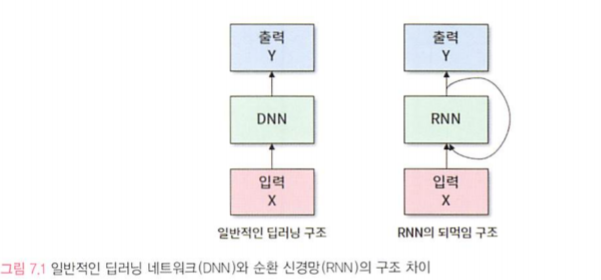

구조를 보면 입력이 x1, x2, x3으로 변할 때 같은 네트워크를 사용해 출력인 y1, y2, y3를 반환하고 있음을 확인할 수 있다.     
중요한것은 풀력값이 다음 음력을 받을 때의 RNN 네트워크에도 동일하게 전달되고 있다는 것이다.     
즉 처음에는 x1을 입력받고, 다음에는 x2와 이전단계 출력인 y1을, 그 다음에는 x3과 이전단계의 출력인 y2를 입력으로 받는다.     
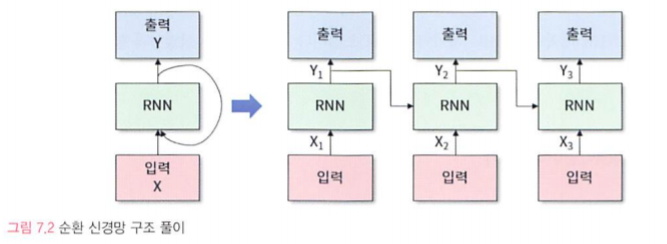

순환신경망은 입력과 출력의 길이에 제한이 없다는 특징이 있다.     
따라서 다양한 형태의 네트워크를 만드는 것이 가능하다.       
각 네트워크는 이미지를 입력했을 때 이미지에 대한 설명을 생성하는 이미지 설명 생성(Image Captionin), 문장의 긍정/부정을 반단하는 감성분석(Sentiment Classification), 하나의 언어를 다른 언어로 번역하는 기계 번역(machine Traslation)등 다양한 용도로 활용된다

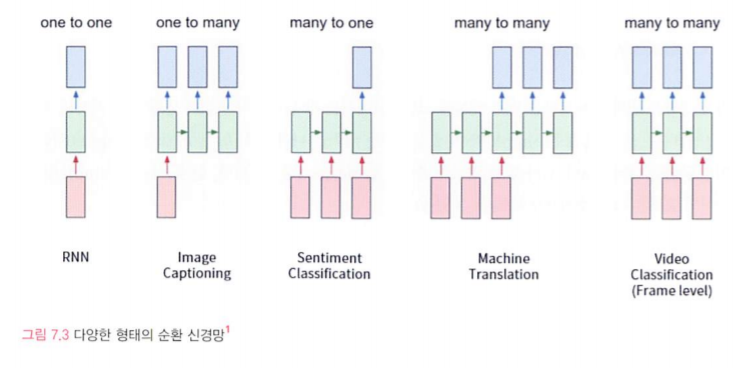

## 주요 레이어 정리
가장 기초적인 레이어는 simpleRNN레이어이다     
실제로는 simpleRNN보다 변종인 LSTM레이어와 GRU레이어가 주로 쓰인다.       
그리고 순환신경망과 함께 자주 쓰이며 자연어 처리를 위해서 꼭 알아둬야 할 임베딩(Embedding)레이어도 알아보겠다

### simpleRNN 
simpleRNN 레이어는 가장 간단한 형태의 RNN레이어 이다.      
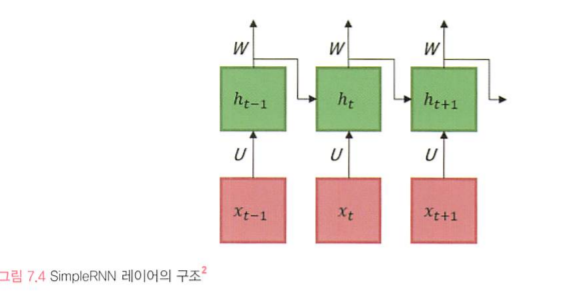

x(t-1), x(t), x(t+1)은 simpleRNN에 들어가는 입력을 나타내고,       
h(t-1), h(t), h(t+1)은 simpleRNN레이어의 출력을 나타낸다.      
U와 W는 입력과 출력에 곱해지는 가중치이다.     
단계 t 에서의 simpleRNN의 출력은     
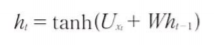      
로 나타낼 수 있다

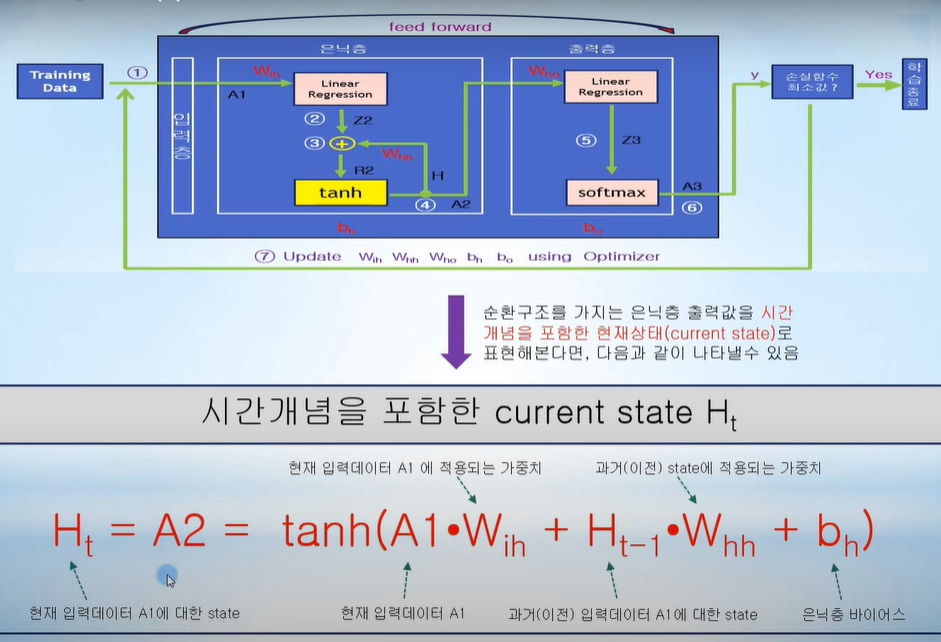

활성화 함수 자리에 ReLU같은 다른 활성화 함수를 써도 된다.     
```
rnn1 = tf.keras.layers.SimpleRNN(units=1, activation='tanh', return_sequences=True)
```
units는 simpleRNN 레이어에 존재하는 뉴런의 수 이다. return_sequences는 출력으로 시퀸스 전체를 출력할지 여부를 나타내는 옵션으로 주로 여러개의 RNN레이어를 쌓을때 쓰인다.

간단한 예제를 보겠다.    
시퀸스를 구성하는 앞쪽 4 개의 숫자가 주어졌을대 그 다음에 올 숫자를 예측하는 간단한 '시퀸스 예측 모델' 을 만들기 위해 simpleRNN을 사용해 보겠다.     
[0.0, 0.1, 0.2, 0.3]이라는 숫자가 주어졌을때 [0.4]를 예측하는 네트워크를 만드는 것이 목표이다.

In [ ]:
import numpy as np
x= []
y= []
for i in range(6):
  lst = list(range(i, i+4))
  x.append(list(map(lambda c: [c/10], lst)))

  y.append((i+4)/10)

x= np.array(x)
y = np.array(y)
for i in range(len(x)):
  print(x[i], y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [ ]:
x.shape, x[0].shape

((6, 4, 1), (4, 1))

이 다음으로 simpleRNN레이어를 사용한 네트워크를 정의하겠다.    
출력을 위해 Dense레이어가 뒤에 추가되었다


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
                             tf.keras.layers.SimpleRNN(units = 10, return_sequences=False, input_shape=[4,1]),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer = 'adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


주목해야 할 것은 input_shape이다 [4,1]은 각각 timesteps, input_dim을 나타낸다     
timesteps는 순환 신경망이 입력에 대해 계산을 반복하는 횟수이고,     
input_dims는 입력 백터의 크기를 나타낸다      
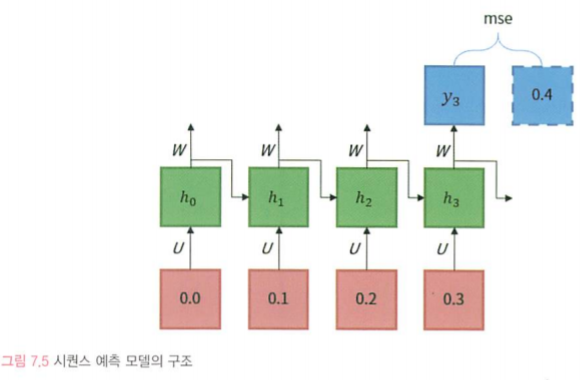

시퀀스 예측모델은 4 타임스텝에 걸쳐 입력을 받고, 마지막에 출력값을 다음 레이어로 반환한다. 우리가 추가한 Dense레이어에는 별도의 활성화함수가 없기 때문에 h3은 바로 y3가 된다.    
그리고 이 값과 0.4와의차이가 mse 즉 평균제곱오차가 된다

In [ ]:
model.fit(x, y, epochs = 100, verbose=0)
print(model.predict(x))

[[0.41985407]
 [0.52280307]
 [0.6177015 ]
 [0.7036573 ]
 [0.78077847]
 [0.84982777]]


얼추 비슷하게 예측하고 있음을 볼 수 있다.

In [ ]:
print(model.predict(np.array([[[0.6],[0.7],[0.8],[0.9]]])))
print(model.predict(np.array([[[-0.1],[0.0],[0.1],[0.2]]])))

[[0.9118347]]
[[0.31083006]]


1과 0.3을 얼추 맞췄다.

## LSTM 레이어


simpleRNN은 데이터가 길어질 수록, 즉 데이터의 타임스텝이 커질수록 학습능력이 떨어진다.    
이를 장기의존성(long term dependency)문제라한다     
(초반의 데이터가 멀리떨어진 데이터에 영향력이 약해지는것)     
장기의존성을 해결하기 위해 LSTM이 나왔다.     
가장 큰 특징은 출력 외에 LSTM 셀 사이에서만 공유되는 셀 상태(cell state)를 가지고 있다는 것이다.

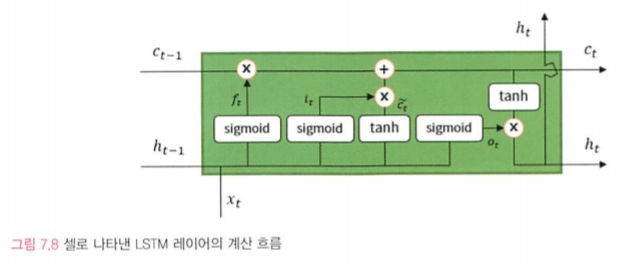

여기서 c(t-1)과 c(t)가 셀상태를 나타낸다      
LSTM셀에서는 셀 상태인 c(t)가 평행성을 그리며 함께 전달되고 있다.     
이처럼 타임스텝을 가로지르며 셀 상태가 보존되기 때문에 장기의존성 문제를 해결할 수있다는 것이 LSTM의 핵심 아이디어이다

sigmoid는 0 ~ 1 범위의 출력을 낸다. 때문에 정보가 통과하는 게이트 역할을 하게된다.    
출력이 0이면 정보가 하나도 통과하지 못하고, 1이면 0이면 100% 통과하게된다

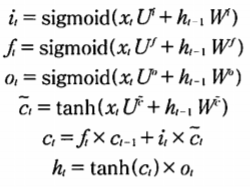

U 와 W는 simpleRNN과 마찬가지로 입력과 출력에 곱해지는 가중치이다. i(t), f(t), o(t)는 각각 타임스텝 t 에서 input, forget, output게이트를 통과한 출력을 의미한다.      
!c(t)는 simpleRNN에도 존재하던 x(t)와 h(t-1)을 각각 U와 W에 곱한뒤 tanh를 취한 값으로, 셀 상태인 c(t)가 되기 전의 출력값이다.      
         

마지막 두 줄은 셀 상태와 LSTM의 출력을 계산하는 가장 중요한 부분이다. 앞의 게이트에서 계산한 결과에 의해 이 두 값이 결정된다.       
셀 상태(c(t))는 forget게이트의 출력에 의해 이전 타임스템의 셀 상태를 얼마만큼 남길지가 결정되고, 새로입력된 input게이트의 출력과 !c(t)를 곱한값을 더해서 다음 타임스텝의 셀 상태를 만든다     
LSTM의 출력인 h(t)는 윗줄에서 계산된 셀 상태에 tanh활성화 삼수를 취한값을 output 게이트의 출력에 곱한다.
